## Analysis of HR department data whether a employ left the company or not using machine learning model

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import os

In [41]:
# reading file
df=pd.read_csv(r'D:\Data set\HR_comma_sep.csv')
# checking for any null value exists or not in data frame
df.isnull().values.any()

False

In [42]:
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [64]:
left=df[df['left']==1]
left.shape
working=df[df['left']==0]
working.shape
# now
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### impact of  salaries on retention

In [79]:
ndf=df.groupby('left')
ldf=ndf.get_group(0)
ndf
wdf=ndf.get_group(1)


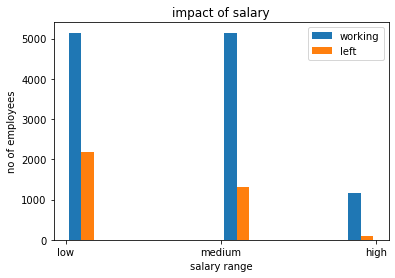

In [124]:
plt.hist([ldf['salary'],wdf['salary']],label=['working','left'])
plt.xlabel('salary range')
plt.ylabel('no of employees')
plt.title('impact of salary')
plt.legend()
plt.show()


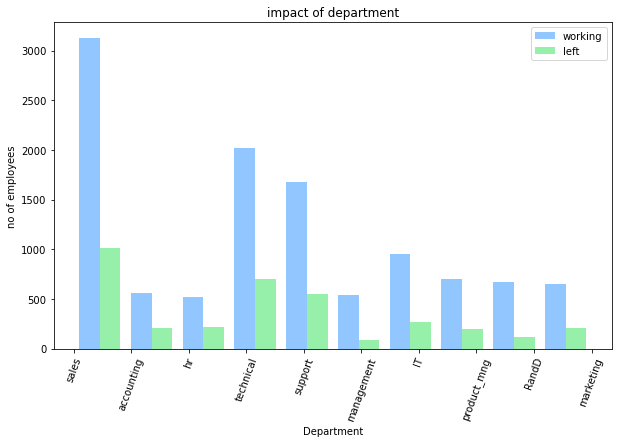

In [128]:
plt.figure(figsize=(10,6))

plt.hist([ldf['Department'],wdf['Department']],label=['working','left'])
plt.xlabel('Department')
plt.ylabel('no of employees')
plt.title('impact of department')
plt.xticks(rotation=70)
plt.legend()
plt.style.use('ggplot')
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
df['salary'].replace({'low':1,'medium':2,'high':3},inplace=True)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [120]:
x_train,x_test,y_train,y_test=train_test_split(df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
                                              ,df['left'],test_size=0.002)
reg=linear_model.LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [121]:
list1=reg.predict(x_test)
for i in list1:
    print(i)

0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0


In [123]:
reg.score(x_test,y_test)

0.7